<a href="https://colab.research.google.com/github/emmad225/DataScienceCoursework/blob/main/HW4a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HW 4

1a. Import the data “chicago gun violence reports.csv” from canvas into python, which contains reports of batteries in Chicago involving a gun from 2016 to 2021. Calculate the total number of events ym in each police “Beat” m in the data. Which beat has the most events and how many does it contain?

In [ ]:
import pandas as pd
import numpy as np
import math
#266 unique beats

data = pd.read_csv('chicago_gun_violence_reports.csv')

array = np.array(data["Beat"]).astype(int)
datacount=data.groupby(['Beat']).size().reset_index(name='Count').sort_values(['Count'], ascending=False)
print(datacount)

     Beat  Count
129  1112    181
116  1011    170
139  1132    165
178  1533    159
140  1133    156
..    ...    ...
198  1811      1
214  1921      1
179  1611      1
199  1812      1
220  1932      1

[266 rows x 2 columns]


Results: From this analysis we can see that there are 266 different beats which correspond to various locations throughout the city. A beat can be interpreted as a singular large neighborhood that is policied by one or two officers. From the results, we can see here that beat "1112" has the most events of gun violence with 181. The second largest beat is 1011 with 170 gun violence events.

1b. Next order the event counts ym in descending order and calculate the lorenz curve and gini index. Make a plot of the lorenz curve. What percent of events are captured in the top 10% of beats?

Gini Coefficent: 0.46146274430680106


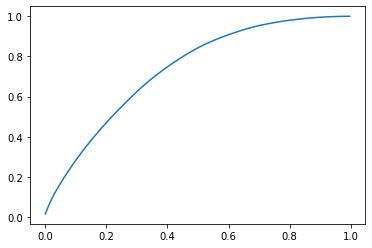

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

M = 266
y = -np.sort(-np.reshape(datacount["Count"],(266,)),)
L=np.cumsum(y)/np.sum(y)
l = []

for k in range(M):
    prob = k/M
    l.append(prob)
plt.plot(l,L)

S = 0
for m in range(M):
  m1 = m + 1
  S+=(M+1-m1) * y[m]

denom = np.sum(y)

G = 1/M * (2*(S/denom) - M - 1)
print("Gini Coefficent:", G)

In [ ]:
location = data.groupby(['Beat']).agg({'Latitude':np.mean, 'Longitude':np.mean}).reset_index()
datamerge = pd.merge(datacount, location, on = 'Beat')
ten = datamerge.head(26)

print(ten)

sum = np.sum(ten['Count'])
sum1 = np.sum(datacount['Count'])
print("Percent of events are captured in the top 10% of events:", sum/sum1 * 100, "%")


    Beat  Count   Latitude  Longitude
0   1112    181  41.898075 -87.720862
1   1011    170  41.864233 -87.722000
2   1132    165  41.872233 -87.726165
3   1533    159  41.877640 -87.749368
4   1133    156  41.872131 -87.717090
5    511    147  41.712881 -87.620461
6   1522    139  41.876765 -87.758982
7   1121    136  41.895533 -87.711875
8   1532    128  41.887875 -87.750323
9    832    120  41.768760 -87.684113
10  1131    118  41.874039 -87.738441
11  1122    116  41.884647 -87.722230
12  1113    113  41.880744 -87.739460
13   523    111  41.669324 -87.634806
14   522    109  41.684174 -87.628804
15  1531    108  41.897134 -87.750734
16  1123    106  41.883279 -87.710523
17  1021    105  41.860671 -87.711653
18  1524    102  41.896995 -87.760378
19   624    102  41.752850 -87.606128
20  1134    101  41.871664 -87.705519
21  1135    101  41.870805 -87.696152
22   533    100  41.655258 -87.606784
23   712    100  41.787534 -87.650481
24   613     99  41.741526 -87.650930
25   621    

RESULTS: In this problem, we first began by creating the Lorenz curve of our data, as well as calculating the Gini coefficient. The curve was created by first sorting our data set of "Beats" and calculating L which was the cumulative sum of the sorted data divided by the sum. We then used the equation for the Gini coefficent which was assigned and printed as G. In this example, our Gini coefficient was roughly 0.46. Next, we incorperated the longitude and latitude data, along with the beats and their counts on the same visual plane. The count is sorted by ascending order and their longitude and latitude values are as follows. The indicies from 0-25 present the data for the top 10% of beats. Through minimal calculations, it was found that approximately 27% of events are captured in the top 10% of beats.

1c. Create a hotspot map of the top 10% of beats with the most reported batteries involving a gun. Place a circle marker at the center of each beat (as defined by the average or median of the incident locations in the beat) and make the size of the marker proportional to the number of incidents. You can use plotly and mapbox to place these markers on the map.

In [ ]:
#plot points on a map
import plotly.express as px
px.set_mapbox_access_token("pk.eyJ1IjoiZW1tYWQyMjUiLCJhIjoiY2w4eDdvOGFwMDN1dDNubWZkNDJyMjRwcyJ9.hSvOLyyWzC8lBRIY-Q0Y3Q")
fig = px.scatter_mapbox(ten, lat="Latitude", lon="Longitude",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10, size = 'Count')
fig.show()

RESULTS: This is a visual of the data in question 1b. This uses the data and plots the top 10% of beats on a map and the precise location of where these incidents occured. The larger circles represent a higher frequency of crimes. This map indicates hotspots with the highest crime frequencies in and around Chicago that contribute to the top 10% of neighborhood locations.